In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data/model_evaluation.csv")
df

,Model,Accuracy,Precision,Recall,F1-score,Log Loss
0,Logistic Regression,0.586667,0.498570,0.491738,0.447989,0.921939
1,KNN,0.496667,0.445334,0.455172,0.446760,5.703128
2,Naive Bayes,0.590000,0.556033,0.496905,0.469699,0.927380
3,Decision Tree,0.430000,0.396670,0.395225,0.394792,20.544882
4,Random Forest,0.543333,0.472002,0.471805,0.456365,0.989980
5,Gradient Boosting,0.546667,0.454981,0.465635,0.445643,0.989236
6,SVM,0.573333,0.525433,0.481216,0.461559,0.959034


In [4]:
weights = np.array([0.20, 0.20, 0.20, 0.25, 0.15])
impacts = np.array([1, 1, 1, 1, -1])


In [5]:
matrix = df.iloc[:, 1:].values.astype(float)


In [6]:
norm_matrix = matrix / np.sqrt((matrix ** 2).sum(axis=0))

In [7]:
weighted_matrix = norm_matrix * weights

In [8]:
ideal_best = np.where(
    impacts == 1,
    weighted_matrix.max(axis=0),
    weighted_matrix.min(axis=0)
)

ideal_worst = np.where(
    impacts == 1,
    weighted_matrix.min(axis=0),
    weighted_matrix.max(axis=0)
)

In [9]:
dist_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))

In [10]:
df["TOPSIS Score"] = dist_worst / (dist_best + dist_worst)
df["Rank"] = df["TOPSIS Score"].rank(ascending=False, method="dense")

df.sort_values("Rank")

,Model,Accuracy,Precision,Recall,F1-score,Log Loss,TOPSIS Score,Rank
2,Naive Bayes,0.590000,0.556033,0.496905,0.469699,0.927380,0.999734,1.0
6,SVM,0.573333,0.525433,0.481216,0.461559,0.959034,0.958202,2.0
0,Logistic Regression,0.586667,0.498570,0.491738,0.447989,0.921939,0.932826,3.0
4,Random Forest,0.543333,0.472002,0.471805,0.456365,0.989980,0.899704,4.0
5,Gradient Boosting,0.546667,0.454981,0.465635,0.445643,0.989236,0.882801,5.0
1,KNN,0.496667,0.445334,0.455172,0.446760,5.703128,0.721472,6.0
3,Decision Tree,0.430000,0.396670,0.395225,0.394792,20.544882,0.000000,7.0


In [11]:
df.to_csv("FinalResult.csv", index=False)


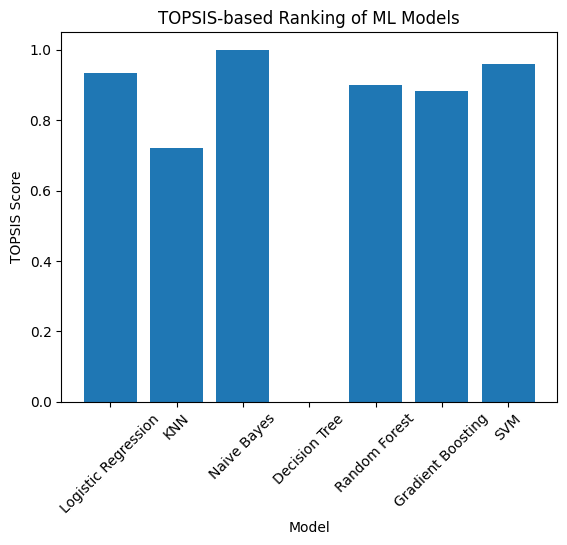

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(df["Model"], df["TOPSIS Score"])
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS-based Ranking of ML Models")
plt.show()
